In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [74]:
df =pd.read_csv('Datasets\SOCR-HeightWeight.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ACER\AppData\Local\Temp\ipykernel_9560\488022860.py:1: SyntaxWarning: invalid escape sequence '\S'
  df =pd.read_csv('Datasets\SOCR-HeightWeight.csv')


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [75]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0, 0.5, 'Height')

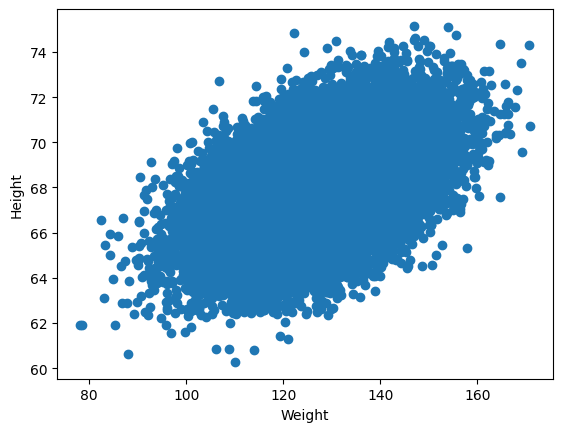

In [76]:
## Scatter plot

plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Weight')
plt.ylabel("Height")

In [77]:
## correlation

df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


In [78]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


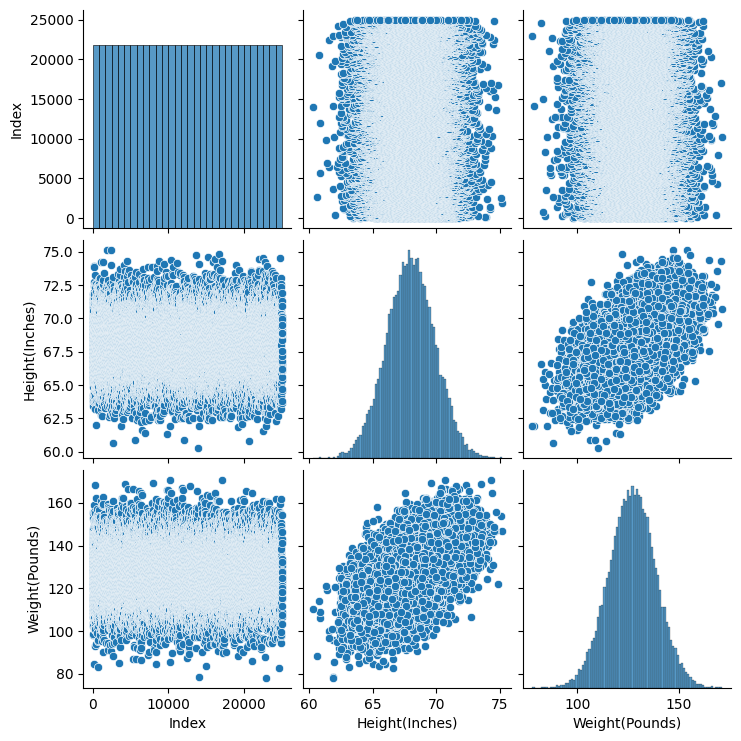

In [79]:
import seaborn as sns
sns.pairplot(df)

In [80]:
## Independent and dependent features
X = df[['Weight(Pounds)']]  ## create the datafram or 2 dimenssion array
y = df['Height(Inches)']   ## dependent features are in series or 1D array
type(X)
X.head(5)

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [81]:
y.head()

0    65.78331
1    71.51521
2    69.39874
3    68.21660
4    67.78781
Name: Height(Inches), dtype: float64

In [82]:
## Train Test Split

from sklearn.model_selection import train_test_split


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [84]:
X_train.shape

(18750, 1)

In [85]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [86]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]], shape=(6250, 1))

In [88]:
## Apply Simple linear Regression

from sklearn.linear_model import LinearRegression



In [89]:
regression = LinearRegression(n_jobs=-1)

In [90]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [91]:
print("Coefficient or slop :",regression.coef_)
print("Intercept :", regression.intercept_)

Coefficient or slop : [0.94883892]
Intercept : 67.9938252704


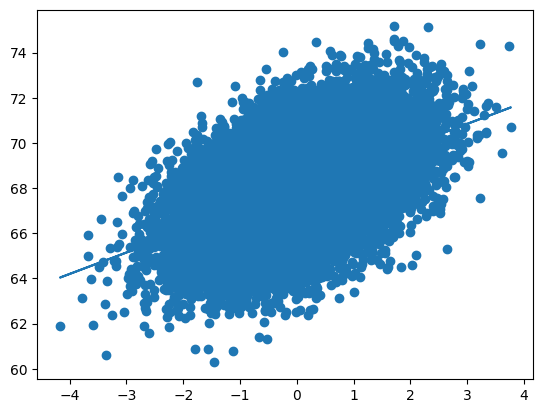

In [92]:
## Plot Traning data plot best fit line

plt.scatter(X_train,y_train)

plt.plot(X_train, regression.predict(X_train))

In [93]:
## Prediction for test data

y_pred = regression.predict(X_test)

In [94]:
# Performans Mrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [96]:
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)

rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

2.7333807993730996
1.3166150322297803
1.6532939240719116


In [97]:
## R Square

from sklearn.metrics import r2_score


In [98]:
score=r2_score(y_test,y_pred)
print(score)

0.2592643941428425


In [99]:
## Adjusted R2

1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25914583850810224

In [102]:
## OLS Linear Regression
import statsmodels.api as sm

In [103]:
model = sm.OLS(y_train, X_train).fit()

In [104]:
prediction = model.predict(X_test)
print(prediction)

[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [105]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                      0.0561
Time:                        08:59:16   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [107]:
## Prediction for new data

regression.predict(scaler.transform([[72]]))

d:\All-Machine_Learning_Algorithem-Implimentation\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.50061832])